In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [170]:
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [187]:
# load model 

pathInception = r'C:\Users\Honor\Documents\Projects\Plant-disease-detection\Local_models\Downloads\saved_models\saved_models\1'
pathCNN96 = r'C:\Users\Honor\Documents\Projects\Plant-disease-detection\Saved_Models\file\kaggle\working\Saved_Models\4'
pathResNet = r'C:\Users\Honor\Documents\Projects\Plant-disease-detection\Local_models\plant-disease-model-complete_resnet99.pth'
model = load_model(pathCNN96)

# check model info 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 250, 250, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 83, 83, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 83, 83, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 83, 83, 64)        3

# Save the model ass h5

In [173]:
model.save('../Saved_Models/model.h5')


C:\Users\Honor\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [175]:
model = load_model('../Saved_Models/model.h5')
model

<h1 class='alert alert-warning'>Evaluate the Model:</h1>

# Test The Keras Model

In [176]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from keras.preprocessing import image
import numpy as np
from PIL import Image
from skimage import transform
from keras.preprocessing import image
import numpy as np
from PIL import Image
from skimage import transform

In [177]:
image1 = "../TestImages/Orange.png"
image2 = "../TestImages/Orange_citrus_greening1.png" #
image3 = "../TestImages/Orange_greening.png" #
image4 = "../TestImages/apple_scab.png"
image5 = "../TestImages/grape_black.jpeg"
image6 = "../TestImages/potato_late.png"
image7 = "../TestImages/early_blight_1.jpg" #

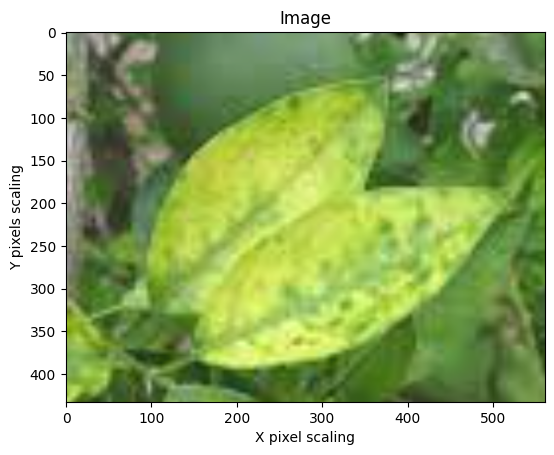

1/1 [==============================] - 0s 111ms/step
Predicted class: Corn_(maize)___healthy || fileName: ../TestImages/Orange_greening.png


<BarContainer object of 38 artists>

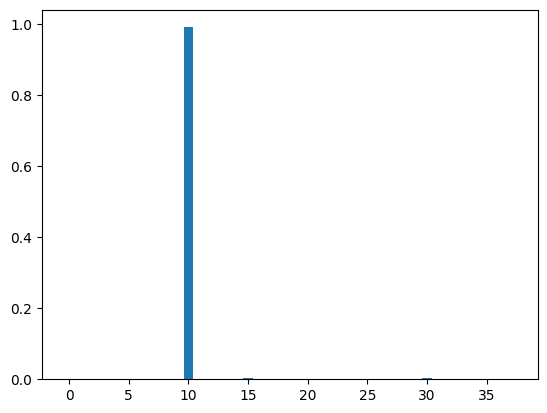

In [193]:
image_to_test = image3

plt.title("Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image_ = mpimg.imread(image_to_test)
plt.imshow(image_)
plt.show()

# Dimensions of your model's expected input images
img_width, img_height = 250, 250

# Load and resize the test image
test_image = image.load_img(image_to_test, target_size=(img_width, img_height))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Continue with prediction
result = model.predict(test_image, batch_size=1)
# result

predictions = result
predlabel = []
prdlbl = []

for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
for i in range(len(predlabel)):
        print(f'Predicted class: {predlabel[i]} || fileName: {image_to_test}')
        
ypoints = np.array(result[0])
xpoints = np.array([i for i in range(len(ypoints))])
plt.bar(xpoints, ypoints)

<hr>

# Test pytorch model

In [126]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
# from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [137]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [128]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

In [132]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

In [136]:
# defining the model and moving it to the GPU
model = ResNet9(3, 38)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [144]:
pathResNet = r'C:\Users\Honor\Documents\Projects\Plant-disease-detection\Local_models\resnet\plant-disease-model.pth'

model.load_state_dict(torch.load(pathResNet, map_location=torch.device('cpu')))
model.eval()

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# Prediction

In [155]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

In [168]:
# predicting first image
img = Image.open(image1)
img = img.convert('RGB')
convert_tensor = transforms.ToTensor()
img = convert_tensor(img)
# plt.imshow(img.permute(1, 2, 0))
print('Label:', image1, ', Predicted:', predict_image(img, model))

RuntimeError: Given input size: (512x3x3). Calculated output size: (512x0x0). Output size is too small

# Save the model with pd format

In [3]:
model_version = 3
model.save(f"../Saved_Models/{model_version}")

INFO:tensorflow:Assets written to: ../Saved_Models/3\assets


INFO:tensorflow:Assets written to: ../Saved_Models/3\assets


In [6]:
# from tensorflow import keras

# model_version = 2
# keras.experimental.export_saved_model(model, f'../Saved_Models/{model_version}')

AttributeError: module 'tensorflow.keras.experimental' has no attribute 'export_saved_model'